# Review an algorithm using jupyter lab

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import os
import plotly.graph_objects as go
%matplotlib inline     
sns.set(color_codes=True)

In [66]:
%pwd

'/home/shoff/Projekte/Automatically-Estimating-Task-Durations/Scripts'

In [67]:
df = pd.read_csv("./output/A004_SWE-Archiv-2020_SWE-Archiv-2020_.csv")
df['EstimationErrorInSeconds'] = df.apply (lambda row: row["EstimateInSeconds"] - row["DurationInSeconds"], axis=1)
df['DurationInHours'] = df.apply (lambda row: row["DurationInSeconds"]/60/60, axis=1)
df['DurationAsHour'] = df.apply (lambda row: round(row["DurationInSeconds"]/60/60,0), axis=1)
df['EstimationErrorInHours'] = df.apply (lambda row: row["EstimateInSeconds"]/60/60, axis=1)
df.tail(1)


,Name,Column,Color,Time spent,DurationInSeconds,EstimateInSeconds,EstimationErrorInSeconds,DurationInHours,DurationAsHour,EstimationErrorInHours
1022,IT-Service: Ticketsystem einrichten 28.12.2020...,12.202,White,0.575,2070.0,2431.655303,361.655303,0.575,1.0,0.67546


In [79]:
result = list()

for i in range(0,40):
    taskCount=len(df[df["DurationAsHour"]==i])
    mean = df[df["DurationAsHour"]==i]["EstimationErrorInHours"].mean()
    standard_deviation = df[df["DurationAsHour"]==i]["EstimationErrorInHours"].std()
    standard_deviation_minus = mean - standard_deviation
    standard_deviation_plus = mean + standard_deviation
    result.append(dict (
        task_duration_in_about_hours = i,
        taskCount = taskCount,
        mean = mean,
        standard_deviation = standard_deviation,
        standard_deviation_minus = standard_deviation_minus,
        standard_deviation_plus = standard_deviation_plus
    ))

error_distribution = pd.DataFrame(result)
error_distribution

,task_duration_in_about_hours,taskCount,mean,standard_deviation,standard_deviation_minus,standard_deviation_plus
0,0,592,1.134883,1.443164,-0.308281,2.578047
1,1,241,1.424227,1.276825,0.147402,2.701052
2,2,64,2.424928,1.403545,1.021383,3.828473
3,3,39,2.625373,1.271473,1.353900,3.896846
4,4,21,3.408712,2.375001,1.033711,5.783713
5,5,12,4.216219,1.540982,2.675237,5.757201
6,6,11,3.391010,0.848564,2.542446,4.239574
7,7,5,4.910909,1.328106,3.582803,6.239016
8,8,5,8.667462,4.305842,4.361620,12.973304
9,9,2,4.278785,0.513537,3.765248,4.792321


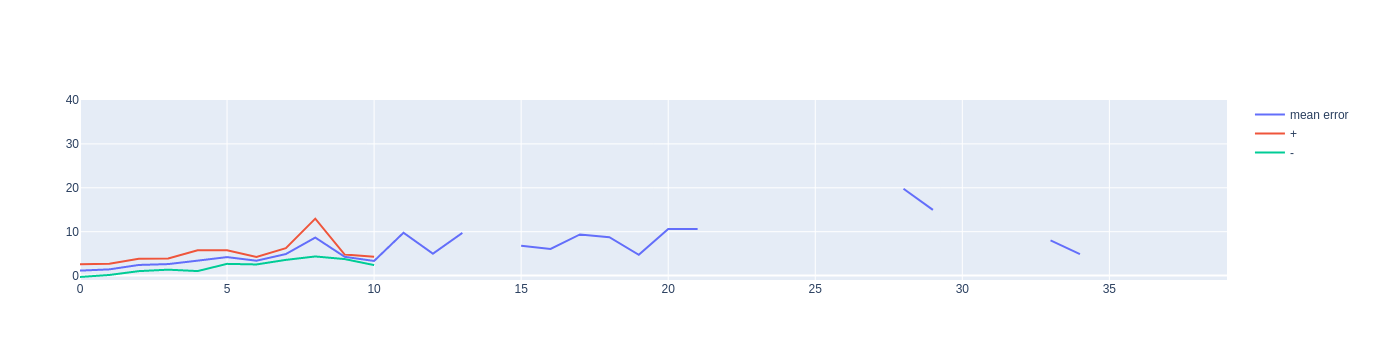

In [91]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=error_distribution["task_duration_in_about_hours"], y=error_distribution["mean"], mode='lines',name='mean error'))
fig.add_trace(go.Scatter(x=error_distribution["task_duration_in_about_hours"], y=error_distribution["standard_deviation_plus"], mode='lines',name='+'))
fig.add_trace(go.Scatter(x=error_distribution["task_duration_in_about_hours"], y=error_distribution["standard_deviation_minus"], mode='lines',name='-'))

fig.update(layout_yaxis_range = [-1,40])



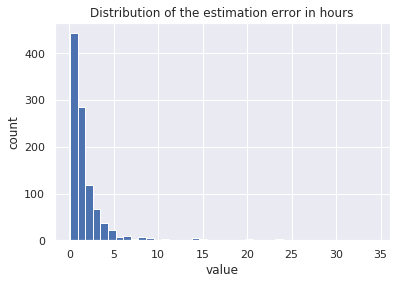

In [89]:
plt.hist(df["EstimationErrorInHours"], bins=40)
plt.title("Distribution of the estimation error in hours")
plt.xlabel("value")
plt.ylabel("count")
plt.show()
#plt

In [71]:
df2 = pd.read_csv("./output/A004_SWE-Archiv-2020_SWE-Archiv-2021_.csv")
df2['EstimationErrorInSeconds'] = df2.apply (lambda row: row["EstimateInSeconds"] - row["DurationInSeconds"], axis=1)
df2['EstimationErrorInHours'] = df2.apply (lambda row: row["EstimateInSeconds"]/60/60, axis=1)
df2.tail(1)


,Name,Column,Color,Time spent,DurationInSeconds,EstimateInSeconds,EstimationErrorInSeconds,EstimationErrorInHours
1256,Webseite: QA ausführen,8.2021,White,1.02,3672.0,1262.859842,-2409.140158,0.350794


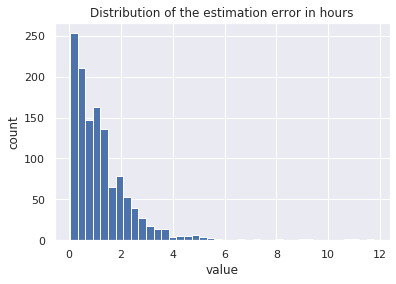

In [72]:
plt.hist(df2["EstimationErrorInHours"], bins=40)
plt.title("Distribution of the estimation error in hours")
plt.xlabel("value")
plt.ylabel("count")
plt.show()